In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = np.array([ [3.2, 4.1],
                 [1.2, 2.5],
                 [4.5, 3.2],
                 [3.1, 3.9],
                 [5.5, 5.8],
                 [3.7, 3.8],
                 [2.8, 2.5],
                 [1.5, 1.6],
                 [2.7, 2.9],
                 [1.9, 1.7]])

In [21]:
# Step 1: Standardize the data (manually)
mean_data = np.mean(data, axis=0)   # Mean of each feature
std_data = np.std(data, axis=0)     # Standard deviation of each featur

In [22]:
#Import the PCA class from the sklearn.decomposition module
from sklearn.decomposition import PCA

# Calculate standardized data
data_standardized = (data - mean_data) / std_data

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Change n_components to the desired number of components
pca.fit(data_standardized) # Changed 'data_stan' to 'data_standardized'
data_pca = pca.transform(data_standardized)

In [23]:
data_standardized = (data - mean_data) / std_data

In [24]:
# Step 2: Calculate the covariance matrix
cov_matrix = np.cov(data_standardized.T)  # Covariance matrix

In [25]:
# Step 3: Compute eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [26]:
# Step 4: Sort the eigenvalues in descending order and sort eigenvectors accordingly
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices of sorted eigenvalues in descending order
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [27]:
# Step 5: Select the top k eigenvectors (here we take 2 principal components)
k = 2  # Number of principal components
eigenvectors_reduced = eigenvectors[:, :k]

In [28]:
# Step 6: Project the data onto the new space (principal components)
data_pca = np.dot(data_standardized, eigenvectors_reduced)

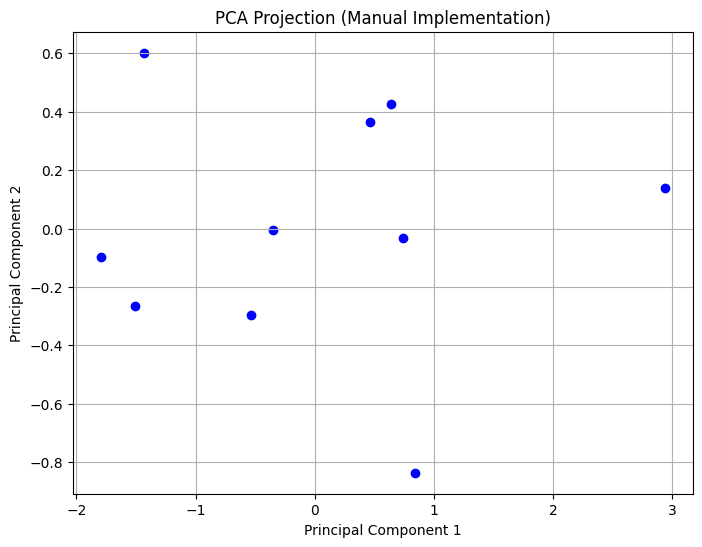

In [29]:
# Step 7: Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (Manual Implementation)')
plt.grid()
plt.show()

In [30]:
# Print explained variance (eigenvalues represent variance explained by each component)
explained_variance = eigenvalues / np.sum(eigenvalues)
print(f"Explained variance by each principal component: {explained_variance}")

Explained variance by each principal component: [0.92186428 0.07813572]
